In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/data.csv')
df.head(10)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,2911.792231,1546.914539,0.000000,831.525120,13.890948,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,1626.143346,1137.351325,1551.723167,564.235007,7.160376,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,3368.457108,2178.515847,3160.026299,628.371220,13.997808,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,2858.194240,6128.550387,4571.118217,0.000000,2526.055712,16.455440,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186852,1092.689024,1169.095816,1445.215694,515.510300,7.533982,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076
5,24875.610267,57,4,Self_Employed,Tier_2,4975.122053,0.000000,1038.230996,3250.067756,1760.164812,1049.067453,751.016815,1024.309765,1022.295439,2003.852035,402.217843,5.944242,1478.666359,7599.265300,957.619116,521.683848,135.925865,148.952326,86.567256,13.143683,33.961843,96.675925
6,106119.692762,53,0,Self_Employed,Tier_2,21223.938552,0.000000,4360.202710,12790.390693,6345.738036,4390.905104,2626.771629,6202.549938,3807.098562,0.000000,2776.771814,17.338502,18399.564592,41595.325723,2799.234658,912.958599,438.009790,541.702363,838.299989,111.857588,0.000000,409.453143
7,55431.341508,40,1,Professional,Tier_2,11086.268302,8307.702220,1755.439820,8194.482410,3353.001888,1741.913582,1219.684252,2361.975893,2574.449981,5520.436852,850.041712,11.972313,6636.413893,8465.944597,1059.499640,838.163700,466.179258,327.902059,353.411650,92.739538,116.121727,71.520963
8,20606.733121,32,4,Retired,Tier_1,6182.019936,3562.488826,1018.589940,3066.867220,1170.790666,688.059838,418.233816,921.232717,830.237055,1939.226547,446.068688,6.304984,362.917872,362.917872,822.974023,212.998059,85.489142,97.812946,252.344383,9.984250,59.957848,80.754353
9,46304.790235,30,1,Student,Tier_2,9260.958047,0.000000,2130.254825,5065.627032,2500.054847,2040.310666,1016.613164,2945.433561,1649.757514,3085.991147,919.533156,12.126401,5615.104745,15690.256276,962.019888,380.272262,598.882904,188.311642,793.644470,34.873044,39.738841,203.146675


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [ ]:
df.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,2504.976953,1663.081794,2498.348422,830.553181,9.804183,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,2522.981880,1628.163024,3098.438166,845.019922,3.903858,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,75.429414,53.500761,0.000000,20.503223,5.000042,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422246,0.000000,580.204749,2165.426419,1124.578012,581.011801,581.632906,1017.670366,684.364440,611.682170,323.626896,6.940423,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091535,1933.845509,1029.109726,1020.198376,1766.474869,1189.203827,1701.901075,579.078393,8.898622,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940492,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104082,3103.723308,2057.082277,3311.705122,1025.195018,11.877171,6216.309609,13331.950716,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674703,123080.682009,38734.932935,119816.898124,81861.503457,34406.100166,38667.368308,53725.442255,36001.527365,81665.091857,15856.359401,24.998776,245504.485208,377060.218482,34894.644404,12273.258242,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


In [ ]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings',
       'Disposable_Income', 'Potential_Savings_Groceries',
       'Potential_Savings_Transport', 'Potential_Savings_Eating_Out',
       'Potential_Savings_Entertainment', 'Potential_Savings_Utilities',
       'Potential_Savings_Healthcare', 'Potential_Savings_Education',
       'Potential_Savings_Miscellaneous'],
      dtype='object')

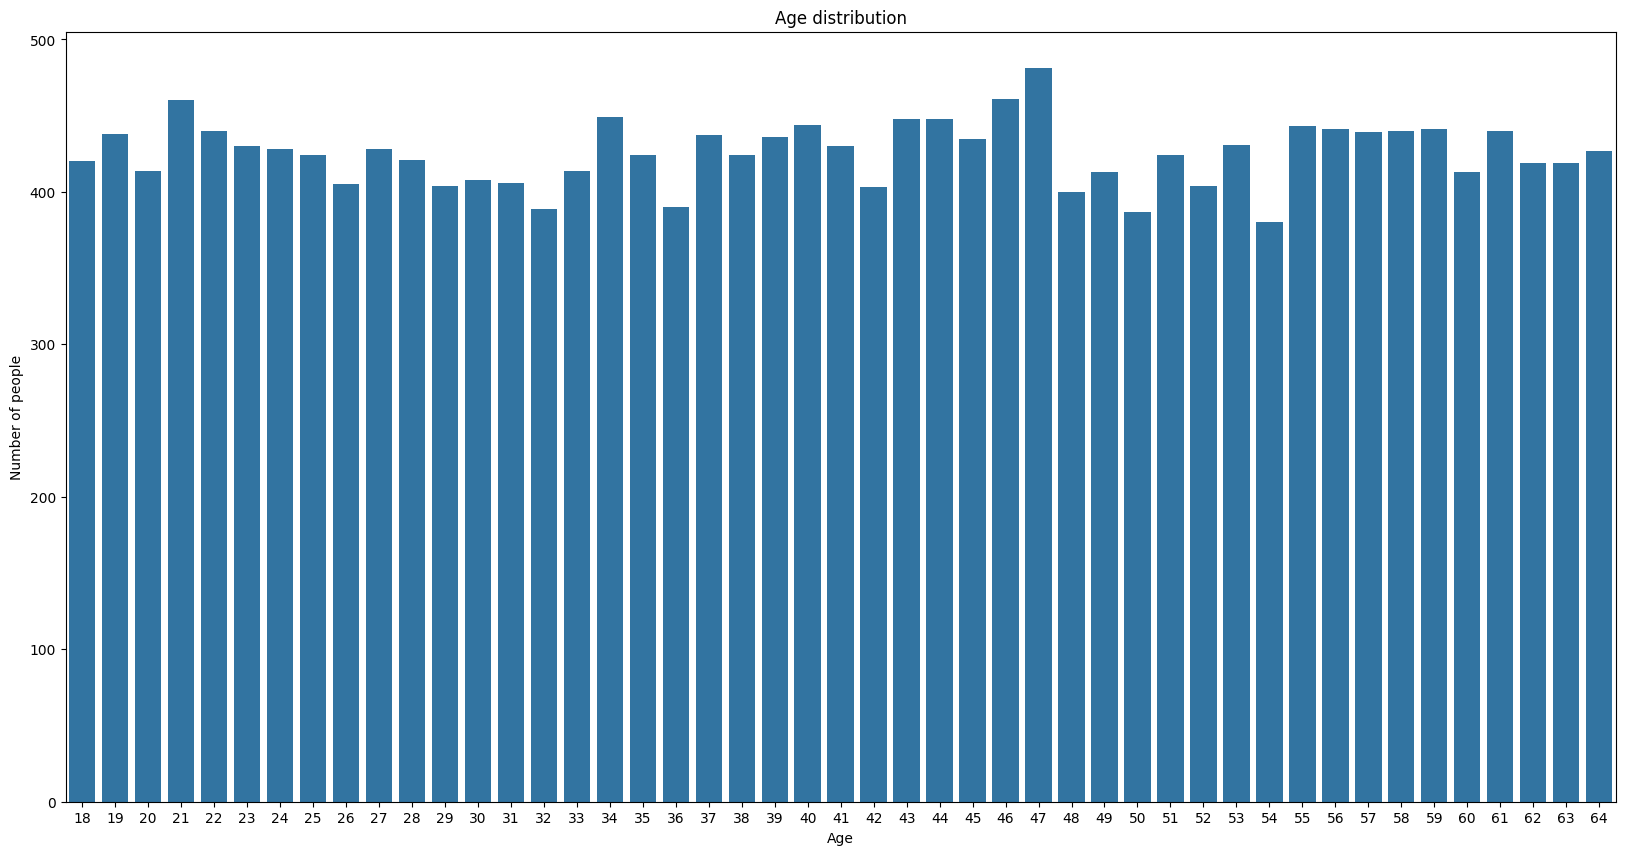

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Age distribution')
plt.show()

In [ ]:
spending_cols=['Groceries','Transport','Eating_Out','Entertainment','Utilities','Healthcare','Education','Miscellaneous']
df['Monthly_Expenditure']=df[spending_cols].sum(axis=1)

df.head()


,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Monthly_Expenditure
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,2911.792231,1546.914539,0.000000,831.525120,13.890948,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517,17773.956909
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,1626.143346,1137.351325,1551.723167,564.235007,7.160376,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606,10940.535924
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,3368.457108,2178.515847,3160.026299,628.371220,13.997808,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422,22107.110260
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,2858.194240,6128.550387,4571.118217,0.000000,2526.055712,16.455440,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183,42920.447081
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186852,1092.689024,1169.095816,1445.215694,515.510300,7.533982,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076,9886.009738


In [ ]:
saving_cols=['Potential_Savings_Groceries','Potential_Savings_Transport',
             'Potential_Savings_Eating_Out','Potential_Savings_Entertainment',
             'Potential_Savings_Utilities','Potential_Savings_Healthcare',
             'Potential_Savings_Education','Potential_Savings_Miscellaneous']
df['Estimated_actual_savings']=df[saving_cols].sum(axis=1)
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Monthly_Expenditure,Estimated_actual_savings
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,2911.792231,1546.914539,0.000000,831.525120,13.890948,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517,17773.956909,3507.222841
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,1626.143346,1137.351325,1551.723167,564.235007,7.160376,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606,10940.535924,1482.618056
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,3368.457108,2178.515847,3160.026299,628.371220,13.997808,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422,22107.110260,3551.316456
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,2858.194240,6128.550387,4571.118217,0.000000,2526.055712,16.455440,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183,42920.447081,6078.520570
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186852,1092.689024,1169.095816,1445.215694,515.510300,7.533982,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076,9886.009738,1511.357063


In [ ]:
df['Disposable_Income_ratio']=df['Disposable_Income']/df['Income']
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Monthly_Expenditure,Estimated_actual_savings,Disposable_Income_ratio
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,2911.792231,1546.914539,0.000000,831.525120,13.890948,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517,17773.956909,3507.222841,0.252382
1,26858.596592,34,2,Retired,Tier_2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,1626.143346,1137.351325,1551.723167,564.235007,7.160376,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606,10940.535924,1482.618056,0.360288
2,50367.605084,35,1,Student,Tier_3,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,3368.457108,2178.515847,3160.026299,628.371220,13.997808,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422,22107.110260,3551.316456,0.275801
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,6809.441427,4889.418087,14690.149363,7106.130005,5040.249158,2858.194240,6128.550387,4571.118217,0.000000,2526.055712,16.455440,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183,42920.447081,6078.520570,0.311643
4,24875.283548,52,4,Professional,Tier_2,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186852,1092.689024,1169.095816,1445.215694,515.510300,7.533982,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076,9886.009738,1511.357063,0.251885


In [ ]:
from sklearn.preprocessing import StandardScaler
scaling_features=['Disposable_Income_ratio','Loan_Repayment','Transport','Monthly_Expenditure',
                     'Estimated_actual_savings']
s=StandardScaler()
df[scaling_features]=s.fit_transform(df[scaling_features])
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Monthly_Expenditure,Estimated_actual_savings,Disposable_Income_ratio,Cluster,PCA1,PCA2
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,-0.478737,2206.490129,6658.768341,-0.025315,1651.801726,1536.184255,2911.792231,1546.914539,0.000000,831.525120,13.890948,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517,-0.030557,0.360089,-0.028192,2,-0.301230,-1.953324
1,26858.596592,34,2,Retired,Tier_2,5371.719318,-0.478737,869.522617,2818.444460,-0.435606,649.378103,1050.241738,1626.143346,1137.351325,1551.723167,564.235007,7.160376,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606,-0.414503,-0.425674,1.082096,2,-1.202114,-0.043090
2,50367.605084,35,1,Student,Tier_3,7555.140763,0.598434,2201.800050,6313.222081,0.193877,1513.814376,1723.306926,3368.457108,2178.515847,3160.026299,628.371220,13.997808,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422,0.212908,0.377202,0.212781,2,0.927480,-1.056450
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,1.111629,4889.418087,14690.149363,1.650864,5040.249158,2858.194240,6128.550387,4571.118217,0.000000,2526.055712,16.455440,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183,1.382337,1.358027,0.581574,1,3.414369,-2.180751
4,24875.283548,52,4,Professional,Tier_2,4975.056710,0.248222,635.907170,3034.329665,-0.535695,692.827225,660.186852,1092.689024,1169.095816,1445.215694,515.510300,7.533982,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076,-0.473753,-0.414520,-0.033308,0,-0.544551,1.998493


In [ ]:
from sklearn.cluster import KMeans

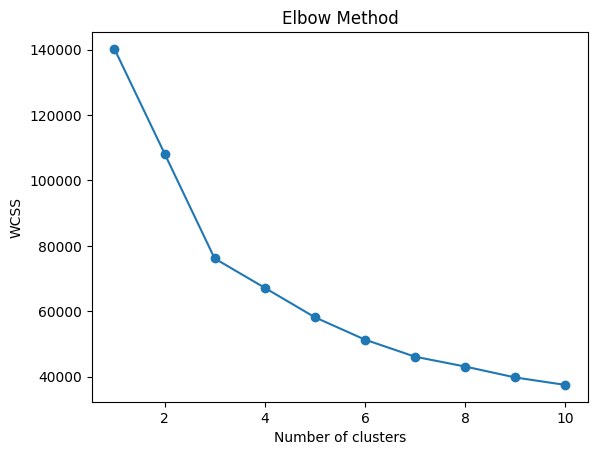

In [ ]:
clustering_features=['Disposable_Income_ratio','Loan_Repayment','Transport','Monthly_Expenditure',
                     'Estimated_actual_savings','Dependents']
X=df[clustering_features]

wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X)
  labels=kmeans.labels_
  sil_score=silhouette_score(X,labels)
  print(f'Number of clusters: {k} Silhouette Score: {sil_score}')

Number of clusters: 2 Silhouette Score: 0.27756953266262874
Number of clusters: 3 Silhouette Score: 0.3112175981656058
Number of clusters: 4 Silhouette Score: 0.27882488260463467
Number of clusters: 5 Silhouette Score: 0.28284000208606214
Number of clusters: 6 Silhouette Score: 0.29250940226162264
Number of clusters: 7 Silhouette Score: 0.27258407423800024
Number of clusters: 8 Silhouette Score: 0.2502617783639274
Number of clusters: 9 Silhouette Score: 0.25238766759155984
Number of clusters: 10 Silhouette Score: 0.252240806960131


In [ ]:
kmeans=KMeans(n_clusters=3, random_state=42)
df['Cluster']=kmeans.fit_predict(X)
df.head(10)

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Monthly_Expenditure,Estimated_actual_savings,Disposable_Income_ratio,Cluster,PCA1,PCA2
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,-0.478737,2206.490129,6658.768341,-0.025315,1651.801726,1536.184255,2911.792231,1546.914539,0.000000,831.525120,13.890948,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517,-0.030557,0.360089,-0.028192,1,-0.301230,-1.953324
1,26858.596592,34,2,Retired,Tier_2,5371.719318,-0.478737,869.522617,2818.444460,-0.435606,649.378103,1050.241738,1626.143346,1137.351325,1551.723167,564.235007,7.160376,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606,-0.414503,-0.425674,1.082096,1,-1.202114,-0.043090
2,50367.605084,35,1,Student,Tier_3,7555.140763,0.598434,2201.800050,6313.222081,0.193877,1513.814376,1723.306926,3368.457108,2178.515847,3160.026299,628.371220,13.997808,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422,0.212908,0.377202,0.212781,1,0.927480,-1.056450
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,1.111629,4889.418087,14690.149363,1.650864,5040.249158,2858.194240,6128.550387,4571.118217,0.000000,2526.055712,16.455440,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183,1.382337,1.358027,0.581574,2,3.414369,-2.180751
4,24875.283548,52,4,Professional,Tier_2,4975.056710,0.248222,635.907170,3034.329665,-0.535695,692.827225,660.186852,1092.689024,1169.095816,1445.215694,515.510300,7.533982,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076,-0.473753,-0.414520,-0.033308,0,-0.544551,1.998493
5,24875.610267,57,4,Self_Employed,Tier_2,4975.122053,-0.478737,1038.230996,3250.067756,-0.354165,1049.067453,751.016815,1024.309765,1022.295439,2003.852035,402.217843,5.944242,1478.666359,7599.265300,957.619116,521.683848,135.925865,148.952326,86.567256,13.143683,33.961843,96.675925,-0.396385,-0.226998,0.518267,0,-0.936253,1.980249
6,106119.692762,53,0,Self_Employed,Tier_2,21223.938552,-0.478737,4360.202710,12790.390693,1.365675,4390.905104,2626.771629,6202.549938,3807.098562,0.000000,2776.771814,17.338502,18399.564592,41595.325723,2799.234658,912.958599,438.009790,541.702363,838.299989,111.857588,0.000000,409.453143,1.158702,1.347547,1.408049,1,1.705369,-2.152219
7,55431.341508,40,1,Professional,Tier_2,11086.268302,1.461552,1755.439820,8194.482410,0.243236,1741.913582,1219.684252,2361.975893,2574.449981,5520.436852,850.041712,11.972313,6636.413893,8465.944597,1059.499640,838.163700,466.179258,327.902059,353.411650,92.739538,116.121727,71.520963,0.421297,0.289576,-1.053566,1,1.826748,-0.989087
8,20606.733121,32,4,Retired,Tier_1,6182.019936,0.353293,1018.589940,3066.867220,-0.575212,688.059838,418.233816,921.232717,830.237055,1939.226547,446.068688,6.304984,362.917872,362.917872,822.974023,212.998059,85.489142,97.812946,252.344383,9.984250,59.957848,80.754353,-0.496525,-0.371457,-2.443839,0,-0.355670,2.213728
9,46304.790235,30,1,Student,Tier_2,9260.958047,-0.478737,2130.254825,5065.627032,-0.076666,2040.310666,1016.613164,2945.433561,1649.757514,3085.991147,919.533156,12.126401,5615.104745,15690.256276,962.019888,380.272262,598.882904,188.311642,793.644470,34.873044,39.738841,203.146675,0.050878,0.241199,0.861488,1,-0.360167,-1.038934


In [ ]:
df['Cluster']=kmeans.labels_

In [ ]:
df.groupby('Cluster')['Age'].mean()

,Age
Cluster,
0,40.976952
1,41.189957
2,40.524986


In [ ]:
df.groupby('Cluster')['Disposable_Income_ratio'].mean()

,Disposable_Income_ratio
Cluster,
0,-0.287636
1,0.347057
2,-0.258784


In [ ]:
df.groupby('Cluster')['City_Tier'].value_counts(normalize=True)

Cluster  City_Tier
0        Tier_2       0.474234
         Tier_1       0.347793
         Tier_3       0.177973
1        Tier_2       0.534239
         Tier_1       0.244850
         Tier_3       0.220911
2        Tier_2       0.498627
         Tier_1       0.294344
         Tier_3       0.207029
Name: proportion, dtype: float64

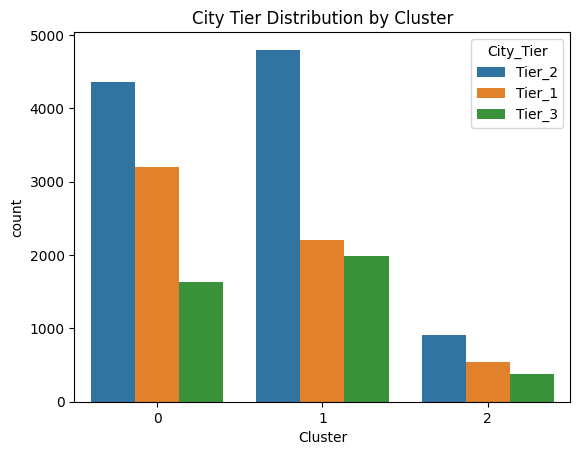

In [ ]:
sns.countplot(data=df, x='Cluster', hue='City_Tier')
plt.title("City Tier Distribution by Cluster")
plt.show()

In [ ]:
df.groupby('Cluster')['Dependents'].value_counts(normalize=True)

Cluster  Dependents
0        3             0.395629
         4             0.391716
         2             0.212655
1        0             0.420666
         1             0.400067
         2             0.179267
2        2             0.220758
         4             0.213619
         3             0.208127
         1             0.202087
         0             0.155409
Name: proportion, dtype: float64

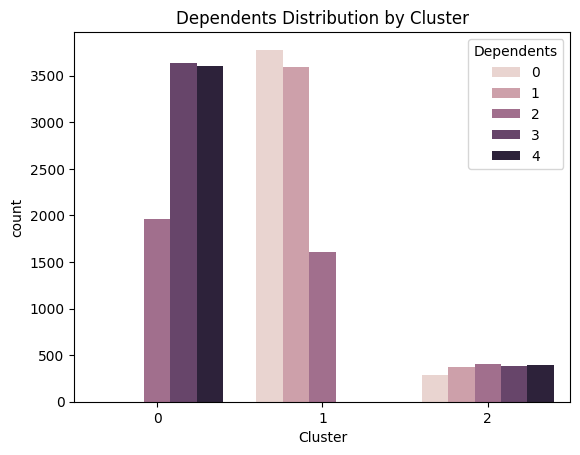

In [ ]:
sns.countplot(data=df, x='Cluster', hue='Dependents')
plt.title("Dependents Distribution by Cluster")
plt.show()

In [ ]:
df['Desired_Savings_Percentage']

,Desired_Savings_Percentage
0,13.890948
1,7.160376
2,13.997808
3,16.455440
4,7.533982
...,...
19995,12.353542
19996,11.754249
19997,13.854837
19998,17.436659


In [ ]:
df.groupby('Cluster')['Desired_Savings_Percentage'].mean()

,Desired_Savings_Percentage
Cluster,
0,8.959061
1,9.021198
2,17.934564


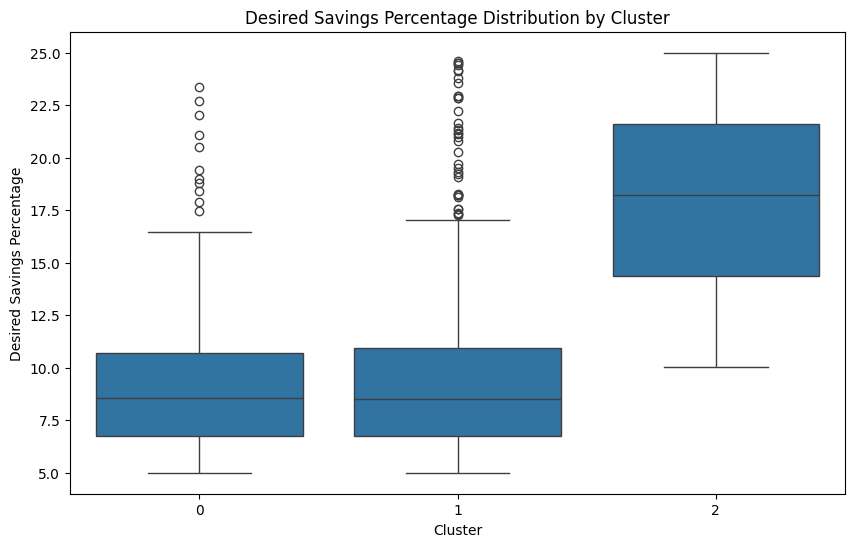

In [ ]:
# prompt: I want a suitable chart to show Desired_Savings_Percentage grouped to Cluster

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='Desired_Savings_Percentage')
plt.title("Desired Savings Percentage Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Desired Savings Percentage")
plt.show()


In [ ]:
df[scaling_features]=s.inverse_transform(df[scaling_features])
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,Utilities,Healthcare,Education,Miscellaneous,Desired_Savings_Percentage,Desired_Savings,Disposable_Income,Potential_Savings_Groceries,Potential_Savings_Transport,Potential_Savings_Eating_Out,Potential_Savings_Entertainment,Potential_Savings_Utilities,Potential_Savings_Healthcare,Potential_Savings_Education,Potential_Savings_Miscellaneous,Monthly_Expenditure,Estimated_actual_savings,Disposable_Income_ratio,Cluster,PCA1,PCA2
0,44637.249636,49,0,Self_Employed,Tier_1,13391.174891,-0.478737,2206.490129,6658.768341,-0.025315,1651.801726,1536.184255,2911.792231,1546.914539,0.000000,831.525120,13.890948,6200.537192,11265.627707,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517,-0.030557,0.360089,-0.028192,1,-0.301230,-1.953324
1,26858.596592,34,2,Retired,Tier_2,5371.719318,-0.478737,869.522617,2818.444460,-0.435606,649.378103,1050.241738,1626.143346,1137.351325,1551.723167,564.235007,7.160376,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606,-0.414503,-0.425674,1.082096,1,-1.202114,-0.043090
2,50367.605084,35,1,Student,Tier_3,7555.140763,0.598434,2201.800050,6313.222081,0.193877,1513.814376,1723.306926,3368.457108,2178.515847,3160.026299,628.371220,13.997808,7050.360422,13891.450624,1466.073984,473.549752,410.857129,459.965256,488.383423,7.290892,106.653597,138.542422,0.212908,0.377202,0.212781,1,0.927480,-1.056450
3,101455.600247,21,0,Self_Employed,Tier_3,15218.340037,1.111629,4889.418087,14690.149363,1.650864,5040.249158,2858.194240,6128.550387,4571.118217,0.000000,2526.055712,16.455440,16694.965136,31617.953615,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183,1.382337,1.358027,0.581574,2,3.414369,-2.180751
4,24875.283548,52,4,Professional,Tier_2,4975.056710,0.248222,635.907170,3034.329665,-0.535695,692.827225,660.186852,1092.689024,1169.095816,1445.215694,515.510300,7.533982,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076,-0.473753,-0.414520,-0.033308,0,-0.544551,1.998493


In [ ]:
df.groupby('Cluster')['Transport'].mean()

,Transport
Cluster,
0,-0.237569
1,-0.217343
2,2.271892


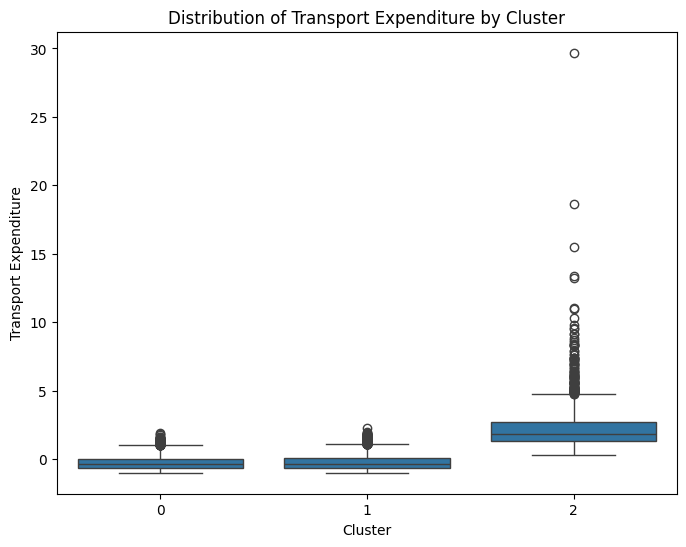

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Transport', data=df)
plt.title('Distribution of Transport Expenditure by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Transport Expenditure')
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
scaling_features=['Disposable_Income_ratio','Loan_Repayment','Transport','Monthly_Expenditure',
                     'Estimated_actual_savings']
r=RobustScaler()
df[scaling_features]=r.fit_transform(df[scaling_features])

In [ ]:
from sklearn.decomposition import PCA
features=['Disposable_Income_ratio','Loan_Repayment','Transport','Monthly_Expenditure',
                     'Estimated_actual_savings','Dependents']
A=df[features]

pca=PCA(n_components=2)
pca_result = pca.fit_transform(A)
df['PCA1']=pca_result[:,0]
df['PCA2']=pca_result[:,1]


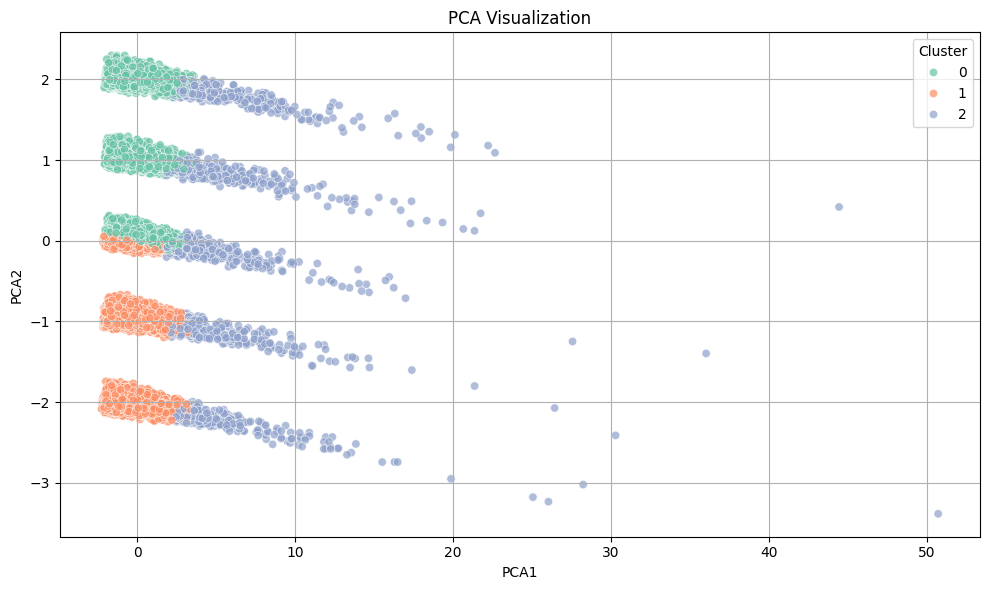

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='PCA1',y='PCA2',hue='Cluster',palette='Set2',alpha=0.7)
plt.title('PCA Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.tight_layout()
plt.show()

•	Cluster 0: People with high number of dependents with low disposable income and moderate savings motivation

•	Cluster 1: Affluent buyers with high disposable income and savings motivation mostly residing in Tier 2 and some in Tier 1 cities

•	Cluster 2: People having dependent families who spend more on transport with low disposable income but high savings motivation